<a href="https://colab.research.google.com/github/mudesir/DS-Unit-1-Build/blob/master/Mudesir_Suleyman_TL_Serina_DS17_Build_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides recipes for loading and saving data from external sources.

#DS Unit 1 Build
# South African Heart Disease Study

Data from https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

Description of the columns header:

1. sbp: systolic blood pressure
2. tobacco: cumulative tobacco (kg)
3. ldl: low densiity lipoprotein cholesterol
4. adiposity
5. famhist: family history of heart disease (Present,  Absent)
6. typea: type-A behavior
7. obesity
8. alcohol: current alcohol consumption
9. age: age at onset
10. chd: coronary heart disease

### Exploratory Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [2]:
df.shape

(462, 11)

In [3]:
df.isnull().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [4]:
# the column row.names is not iportant I will drop it
df = df.drop('row.names', axis=1)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
# check data type
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [5]:
# the famhist data type object we have to change into number, replace "Present" to 1 
# and  "Absent" to 0
df = df.replace({'Present': 1, 'Absent':0})
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [6]:
df.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist        int64
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [7]:
df['age']

0      52
1      63
2      46
3      58
4      49
       ..
457    58
458    52
459    55
460    40
461    46
Name: age, Length: 462, dtype: int64

In [6]:
df.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [8]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [11]:
#  confidence interval for sbp: systolic blood pressure data
import numpy as np
from scipy import stats
data = df['sbp']
confidence_interval(data, confidence=.95)

(136.45294750470532, 138.32683982683983, 140.20073214897434)

In [25]:
# lets make the sbp: systolic blood pressure data group for sbp lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['sbp'] <= 134.5, 'sbpgroup'] = 0 
df.loc[(df['sbp'] > 134.5) & (df['sbp']<=138.3), 'sbpgroup'] = 1
df.loc[df['sbp'] > 138.3, 'sbpgroup'] = 2  
df['sbpgroup'].value_counts()

0.0    242
2.0    172
1.0     48
Name: sbpgroup, dtype: int64

In [26]:
# confidence interval for tobacco data
data = df['tobacco']
confidence_interval(data, confidence=.95)

(3.2157284213322077, 3.635649350649351, 4.055570279966494)

In [27]:
# lets make the tobacco data group for tobacco lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['tobacco'] <= 3.2, 'tobaccogroup'] = 0 
df.loc[(df['tobacco'] > 3.2) & (df['tobacco']<=4.1), 'tobaccogroup'] = 1
df.loc[df['tobacco'] > 4.1, 'tobaccogroup'] = 2  
df['tobaccogroup'].value_counts()

0.0    276
2.0    158
1.0     28
Name: tobaccogroup, dtype: int64

In [12]:
# confidence interval for ldl: low densiity lipoprotein cholesterol data
data = df['ldl']
confidence_interval(data, confidence=.95)

(4.550990135683968, 4.740324675324675, 4.9296592149653815)

In [28]:
# lets make the ldl: low densiity lipoprotein cholesterol data group for ldl lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['ldl'] <= 3.2, 'ldlgroup'] = 0 
df.loc[(df['ldl'] > 3.2) & (df['ldl']<=4.1), 'ldlgroup'] = 1
df.loc[df['ldl'] > 4.1, 'ldlgroup'] = 2  
df['ldlgroup'].value_counts()

2.0    259
0.0    109
1.0     94
Name: ldlgroup, dtype: int64

In [13]:
# confidence interval for adiposity data
data = df['adiposity']
confidence_interval(data, confidence=.95)

(24.695374959717974, 25.4067316017316, 26.118088243745227)

In [31]:
# lets make the adiposity data group for adiposity lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['adiposity'] <= 24.7, 'adipositygroup'] = 0 
df.loc[(df['adiposity'] > 24.7) & (df['adiposity']<=26.1), 'adipositygroup'] = 1
df.loc[df['adiposity'] > 26.1, 'adipositygroup'] = 2  
df['adipositygroup'].value_counts()

2.0    231
0.0    200
1.0     31
Name: adipositygroup, dtype: int64

In [16]:
# confidence interval for typea: type-A behavior data
data = df['typea']
confidence_interval(data, confidence=.95)

(52.206320132369555, 53.103896103896105, 54.001472075422654)

In [32]:
# lets make the typea: type-A behavior data group for typea lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['typea'] <= 24.7, 'typeagroup'] = 0 
df.loc[(df['typea'] > 24.7) & (df['typea']<=26.1), 'typeagroup'] = 1
df.loc[df['typea'] > 26.1, 'typeagroup'] = 2  
df['typeagroup'].value_counts()

2.0    458
1.0      2
0.0      2
Name: typeagroup, dtype: int64

In [17]:
# confidence interval for obesity data
data = df['obesity']
confidence_interval(data, confidence=.95)

(25.65887344225081, 26.04411255411255, 26.429351665974295)

In [33]:
# lets make the obesity data group for obesity lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['obesity'] <= 24.7, 'obesitygroup'] = 0 
df.loc[(df['obesity'] > 24.7) & (df['obesity']<=26.1), 'obesitygroup'] = 1
df.loc[df['obesity'] > 26.1, 'obesitygroup'] = 2  
df['obesitygroup'].value_counts()

2.0    211
0.0    179
1.0     72
Name: obesitygroup, dtype: int64

In [56]:
# confidence interval for alcohol: current alcohol consumption data
data = df['alcohol']
confidence_interval(data, confidence=.95)

(14.806193411597087, 17.044393939393935, 19.282594467190783)

In [57]:
# lets make the alcohol: current alcohol consumption data group for alcohol lessthan the 
#lower bound, between the lower and upper bound and above the upper bound 

df.loc[df['alcohol'] <= 14.8, 'alcoholgroup'] = 0 
df.loc[(df['alcohol'] > 14.8) & (df['alcohol']<=19.3), 'alcoholgroup'] = 1
df.loc[df['alcohol'] > 19.3, 'alcoholgroup'] = 2  
df['alcoholgroup'].value_counts()

0.0    302
2.0    139
1.0     21
Name: alcoholgroup, dtype: int64

In [19]:
# confidence interval for age: age at onset data
data = df['age']
confidence_interval(data, confidence=.95)

(41.48038169516487, 42.816017316017316, 44.15165293686976)

In [35]:
# lets make the age group for age lessthan the lower bound, between the lower and upper
# bound and above the upper bound 

df.loc[df['age'] <= 42, 'agegroup'] = 0 
df.loc[(df['age'] > 42) & (df['age']<=44), 'agegroup'] = 1
df.loc[df['age'] > 44, 'agegroup'] = 2  
df['agegroup'].value_counts()      

2.0    235
0.0    211
1.0     16
Name: agegroup, dtype: int64

In [37]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup,sbpgroup,tobaccogroup,ldlgroup,adipositygroup,typeagroup,obesitygroup,alcoholgroup
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1,2.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0,2.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,2.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0


In [45]:
# New data set the facters which have effect on chd by grouping each data below
# the lower bound confidence interval, between the lower and upper level intervan
# and above the upper bound interval
df_new =df[['sbpgroup', 'alcoholgroup', 'ldlgroup', 'adipositygroup',
          'famhist', 'typeagroup', 'obesitygroup', 'alcoholgroup',
          'agegroup', 'chd']].copy() 
df_new.head()

,sbpgroup,alcoholgroup,ldlgroup,adipositygroup,famhist,typeagroup,obesitygroup,alcoholgroup,agegroup,chd
0,2.0,2.0,2.0,0.0,1,2.0,1.0,2.0,2.0,1
1,2.0,0.0,2.0,2.0,0,2.0,2.0,0.0,2.0,1
2,0.0,0.0,1.0,2.0,1,2.0,2.0,0.0,2.0,0
3,2.0,0.0,2.0,2.0,1,2.0,2.0,0.0,2.0,1
4,0.0,2.0,1.0,2.0,1,2.0,1.0,2.0,2.0,1


In [47]:
df_new.corr()

,sbpgroup,alcoholgroup,ldlgroup,adipositygroup,famhist,typeagroup,obesitygroup,alcoholgroup,agegroup,chd
sbpgroup,1.000000,0.110558,0.202644,0.249295,0.056831,0.017243,0.219585,0.110558,0.258839,0.161840
alcoholgroup,0.110558,1.000000,-0.111148,0.101081,0.053115,-0.023490,0.062054,1.000000,0.054157,0.034815
ldlgroup,0.202644,-0.111148,1.000000,0.361916,0.151426,-0.036456,0.348445,-0.111148,0.244686,0.235587
adipositygroup,0.249295,0.101081,0.361916,1.000000,0.155514,0.036829,0.666578,0.101081,0.442777,0.208988
famhist,0.056831,0.053115,0.151426,0.155514,1.000000,0.014790,0.123211,0.053115,0.223936,0.272373
typeagroup,0.017243,-0.023490,-0.036456,0.036829,0.014790,1.000000,0.006700,-0.023490,0.004692,0.002419
obesitygroup,0.219585,0.062054,0.348445,0.666578,0.123211,0.006700,1.000000,0.062054,0.265687,0.103867
alcoholgroup,0.110558,1.000000,-0.111148,0.101081,0.053115,-0.023490,0.062054,1.000000,0.054157,0.034815
agegroup,0.258839,0.054157,0.244686,0.442777,0.223936,0.004692,0.265687,0.054157,1.000000,0.313842
chd,0.161840,0.034815,0.235587,0.208988,0.272373,0.002419,0.103867,0.034815,0.313842,1.000000


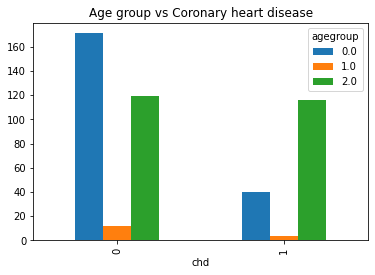

In [54]:
#
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# we have to see each features the crosstab with coronary heart disease
# age group ('0' means age<=42, '1' means 42< age <= 44 and '2' means age >44) 
# and coronary heart disease ('0' means absent and '1' means present)
small_df_cr=pd.crosstab(df['chd'], df['agegroup'])
small_df_cr.plot.bar()
plt.title('Age group vs Coronary heart disease')
plt.show()

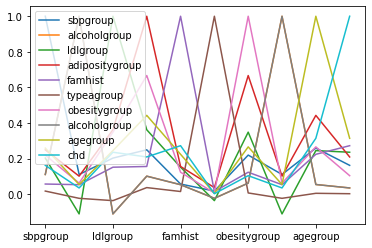

In [70]:
df_new.corr().plot();

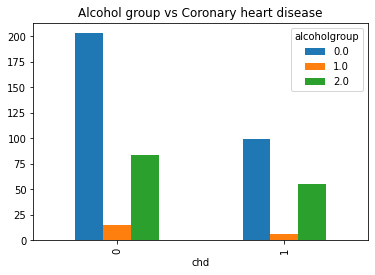

In [58]:
# we have to see each features the crosstab with coronary heart disease
# alcohol group ('0' means age<=14.8, '1' means 14.8< age <= 19.3 and '2' means age >19.3) 
# and coronary heart disease ('0' means absent and '1' means present)
small_df_cr=pd.crosstab(df['chd'], df['alcoholgroup'])
small_df_cr.plot.bar()
plt.title('Alcohol group vs Coronary heart disease')
plt.show()

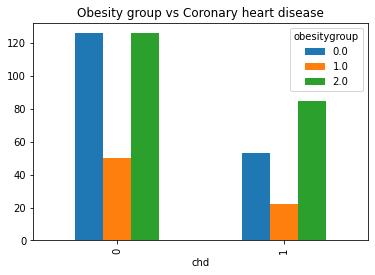

In [59]:
# obesity group ('0' means age<=24.7, '1' means 24.7< age <= 26.1 and '2' means age >26.1) 
# and coronary heart disease ('0' means absent and '1' means present)
small_df_cr=pd.crosstab(df['chd'], df['obesitygroup'])
small_df_cr.plot.bar()
plt.title('Obesity group vs Coronary heart disease')
plt.show()